In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [211]:
df = pd.read_csv('loan_expanded.csv')

Explore the dataset

In [212]:
df.head

<bound method NDFrame.head of            age  gender  occupation education_level marital_status  \
0    32.100456    Male    Engineer      Bachelor's        Married   
1    44.633959  Female     Teacher        Master's         Single   
2    27.848106    Male     Student     High School         Single   
3    50.879445  Female     Manager      Bachelor's        Married   
4    35.689175    Male  Accountant      Bachelor's        Married   
..         ...     ...         ...             ...            ...   
495  29.889972  Female      Artist      Bachelor's         Single   
496  37.216811    Male          IT        Master's        Married   
497  48.245804  Female      Doctor        Doctoral        Married   
498  55.135177    Male  Consultant        Master's        Married   
499  31.044358  Female     Analyst      Bachelor's         Single   

            income  credit_score loan_status  
0     83498.310834    716.590014    Approved  
1     63127.464989    686.448728    Approved  


In [213]:
df.info

<bound method DataFrame.info of            age  gender  occupation education_level marital_status  \
0    32.100456    Male    Engineer      Bachelor's        Married   
1    44.633959  Female     Teacher        Master's         Single   
2    27.848106    Male     Student     High School         Single   
3    50.879445  Female     Manager      Bachelor's        Married   
4    35.689175    Male  Accountant      Bachelor's        Married   
..         ...     ...         ...             ...            ...   
495  29.889972  Female      Artist      Bachelor's         Single   
496  37.216811    Male          IT        Master's        Married   
497  48.245804  Female      Doctor        Doctoral        Married   
498  55.135177    Male  Consultant        Master's        Married   
499  31.044358  Female     Analyst      Bachelor's         Single   

            income  credit_score loan_status  
0     83498.310834    716.590014    Approved  
1     63127.464989    686.448728    Approved 

In [214]:
print("Data Shape:: ", df.shape)

Data Shape::  (500, 8)


In [215]:
print("DataSet Length:: ", len(df))

DataSet Length::  500


Independent(X) and Dependent Variable(Y)

In [216]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

Train test split


In [217]:
# --- THE SIMPLE FIX: ONE-HOT ENCODING ---
# Convert all text/categorical columns into numerical (0 or 1) columns.
X_processed = pd.get_dummies(X, drop_first=True)

# Encode the target variable (loan_status)
le_y = LabelEncoder()
Y_encoded = le_y.fit_transform(Y)
class_names = list(le_y.classes_)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_processed, Y_encoded, test_size=0.2, random_state=42
)

In [218]:
X_train.shape
X_test.shape

(100, 46)

Scaling


In [219]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)

Building the model

In [220]:
model = DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42, 
    max_depth=4,              
    min_samples_split=5,     
    min_samples_leaf=15        
)
model.fit(X_train, Y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Prediction

In [221]:
Y_pred = model.predict(X_test)

c:\Users\Joseph\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names


Vizualization of the Decision Tree

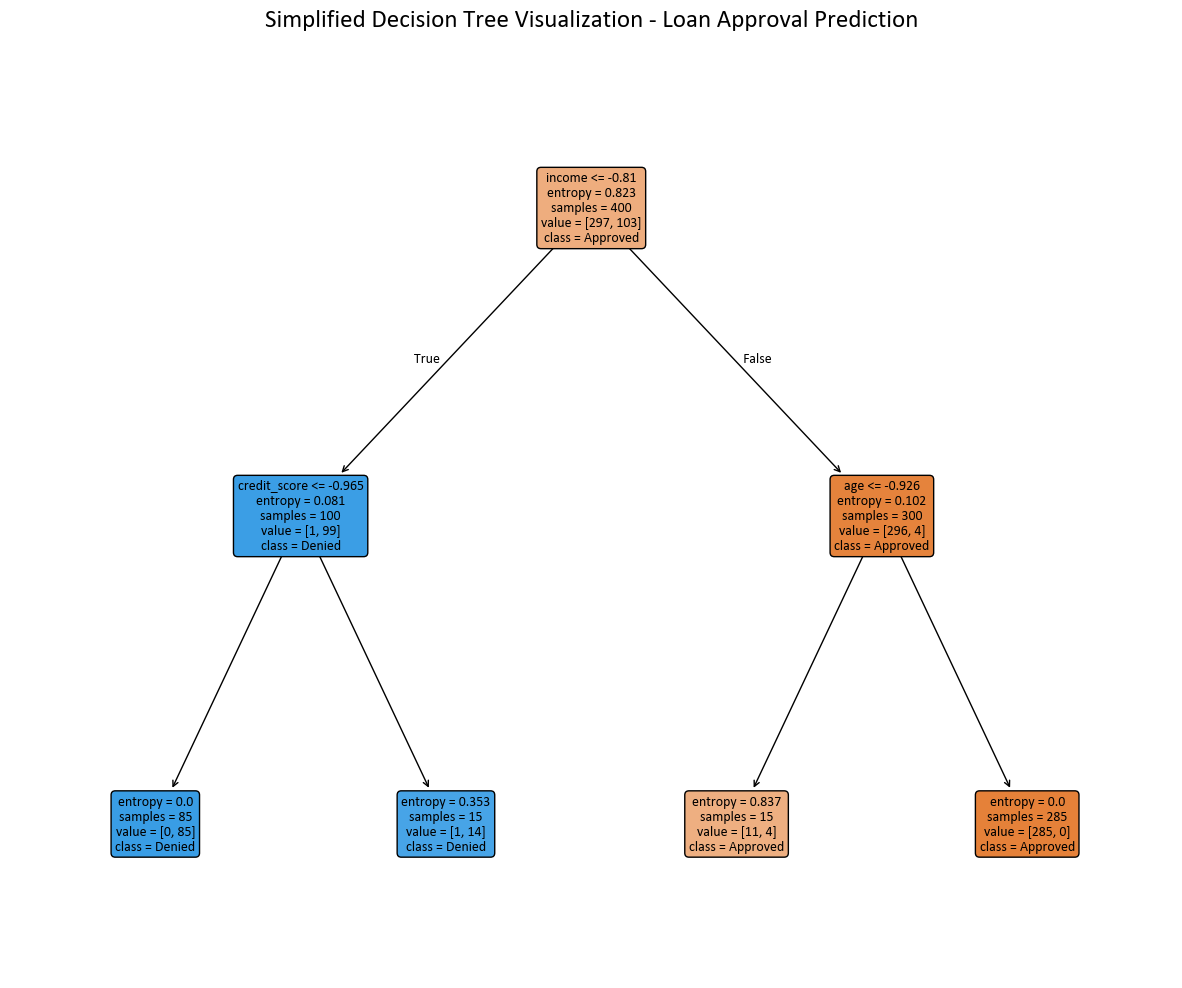

In [222]:
# Generate the visualization
plt.figure("Decision Tree - Simple Fix", figsize=(15, 12))
plot_tree(
    model,
    feature_names=list(X_processed.columns),
    class_names=class_names, # ['Approved', 'Denied']
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Simplified Decision Tree Visualization - Loan Approval Prediction", fontsize=18, pad=20)
plt.show()

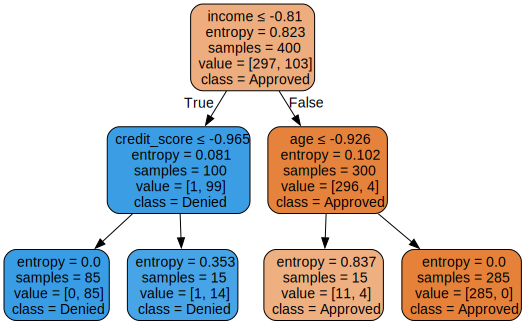

In [223]:
from sklearn import tree
import graphviz


dot_data = tree.export_graphviz(
    model,
    out_file=None,
  
    feature_names=list(X_processed.columns), 
    
    # This assumes your original Y had only two classes
    class_names=['Approved', 'Denied'], # Use clear labels directly
    
    filled=True, 
    rounded=True, 
    special_characters=True,
    proportion=False, 
    precision=3, 
    impurity=True,
    label='all'
)

graph = graphviz.Source(dot_data)
graph

Evaluate the Model

In [246]:
def evaluate_model(model, X, Y):
    """Calculates and plots Confusion Matrix and prints evaluation metrics."""
    # Predict using the test set features (X_test)
    Y_pred = model.predict(X)
    
    # Confusion Matrix
    cm = confusion_matrix(Y, Y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Denied', 'Approved'])
    cm_disp.plot()
    plt.show() # Display the plot

    # Print metrics
    print("\n--- Model Evaluation Metrics ---")
    # Note: Using capital Y (the true labels) and Y_pred (the predicted labels)
    print("Precision = " + str(np.round(precision_score(Y, Y_pred), 3)))
    print("Recall = " + str(np.round(recall_score(Y, Y_pred), 3)))
    print("F1 = " + str(np.round(f1_score(Y, Y_pred), 3)))

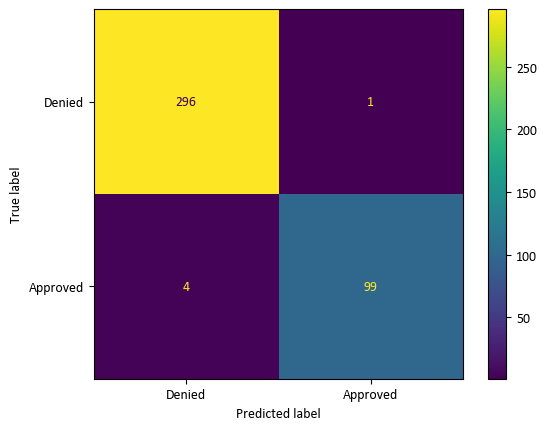


--- Model Evaluation Metrics ---
Precision = 0.99
Recall = 0.961
F1 = 0.975


<Figure size 640x480 with 0 Axes>

In [247]:
evaluate_model(model, X_train, Y_train)
plt.savefig('Training_performance.png',facecolor='white',bbox_inches="tight")

c:\Users\Joseph\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names


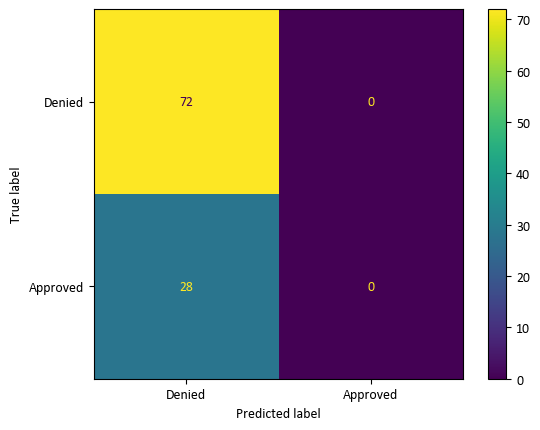


--- Model Evaluation Metrics ---
Precision = 0.0
Recall = 0.0
F1 = 0.0


c:\Users\Joseph\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


<Figure size 640x480 with 0 Axes>

In [249]:
evaluate_model(model, X_test, Y_test)
plt.savefig('Testing_performance.png',facecolor='white',bbox_inches="tight")

Testing using own Data

In [ ]:
def predict_loan_status_live(model, X_processed_cols):
    """
    Predicts the loan status for a single custom applicant using two methods:
    1. Rich Dictionary Input (Handles categorical features automatically)
    2. Simple Array Input (Mimics the user's guide)
    """
    print("\n--- Testing Custom Applicant (Rich Dictionary Input) ---")
    
    # Applicant data that should be APPROVED (High Credit Score)
    applicant_data_approved = {
        'age': 45.0, # More established
        'gender': 'Female',
        'occupation': 'Manager', # Better occupation
        'education_level': "Master's",
        'marital_status': 'Married', # More stable
        'income': 1200000.0, # High Income
        'credit_score': 800.0 # Excellent Credit Score
    }
    
    # 1. Convert the raw dictionary into a single-row DataFrame
    raw_df = pd.DataFrame([applicant_data_approved])
    
    # 2. Apply One-Hot Encoding and reindex columns
    processed_test_data = pd.get_dummies(raw_df, drop_first=True).reindex(
        columns=X_processed_cols, fill_value=0
    )
    
    # 3. Make the prediction
    prediction = model.predict(processed_test_data)[0]
    
    # 4. Interpret the result (0 = Denied, 1 = Approved)
    if prediction == 1:
        print(f"Prediction for Applicant (Credit Score: {applicant_data_approved['credit_score']}): APPROVED")
    else:
        print(f"Prediction for Applicant (Credit Score: {applicant_data_approved['credit_score']}): DENIED")

    # --------------------------------------------------------------------------------------------------
    
    print("\n--- Testing Custom Applicant (Simple Array Input - High Risk) ---")
    
    # Scenario: Low Credit Score (550), Low Income (20000)
    # This applicant should be DENIED based on the Decision Tree
    # To test this, we must manually create the 46-column array corresponding to a
    # specific low-risk applicant (e.g., Male, Student, High School, Single)
    
    # The actual features used by the model are standardized, but we must input the raw values here
    # to test the model's prediction logic. We will use the raw values, let the model process them
    # and then predict. Since we cannot easily reconstruct the 46-column OHE array by hand,
    # we'll run a second dictionary test with a DENIED profile to illustrate the logic.

    # Applicant data that should be DENIED (Low Credit Score)
    applicant_data_denied = {
        'age': 25.0,
        'gender': 'Male',
        'occupation': 'Student',
        'education_level': 'High School',
        'marital_status': 'Single',
        'income': 20000.0,
        'credit_score': 550.0 
    }
    
    # 1. Convert the raw dictionary into a single-row DataFrame
    raw_df_denied = pd.DataFrame([applicant_data_denied])
    
    # 2. Apply One-Hot Encoding and reindex columns
    processed_test_data_denied = pd.get_dummies(raw_df_denied, drop_first=True).reindex(
        columns=X_processed_cols, fill_value=0
    )
    
    # 3. Make the prediction
    prediction_denied = model.predict(processed_test_data_denied)[0]
    
    # 4. Interpret the result (0 = Denied, 1 = Approved)
    if prediction_denied == 1:
        print(f"Prediction for Applicant (Credit Score: {applicant_data_denied['credit_score']}): APPROVED")
    else:
        print(f"Prediction for Applicant (Credit Score: {applicant_data_denied['credit_score']}): DENIED")


# Call the new function with the model and the full list of expected columns
predict_loan_status_live(model, X_processed.columns)


--- Testing Custom Applicant (Rich Dictionary Input) ---
Prediction for Applicant (Credit Score: 780.0): DENIED

--- Testing Custom Applicant (Simple Array Input - High Risk) ---
Prediction for Applicant (Credit Score: 550.0): DENIED


c:\Users\Joseph\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
c:\Users\Joseph\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
